In [1]:
import warnings 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import itertools 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm 
import matplotlib 


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel('Superstore.xls')
df.head(7)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656


In [3]:
furniture  = df.loc[df['Category'] == 'Furniture']

In [4]:
furniture['Order Date'].min() , furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [5]:
cols = ['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols , axis = 1 , inplace = True)
furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [6]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

# Indexing with time series Data

In [7]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [8]:
y = furniture['Sales'].resample('MS').mean()
y['2017': ]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

# Visualizing Furniture Sales Time Series Data

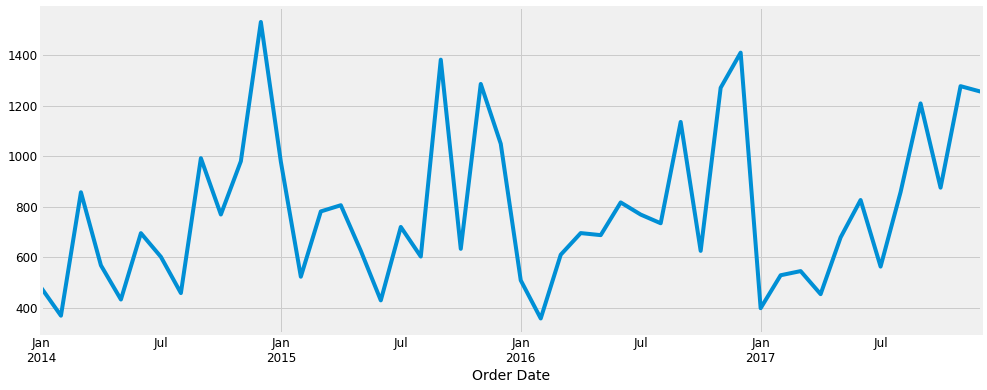

In [9]:
y.plot(figsize=(15,6))
plt.show()

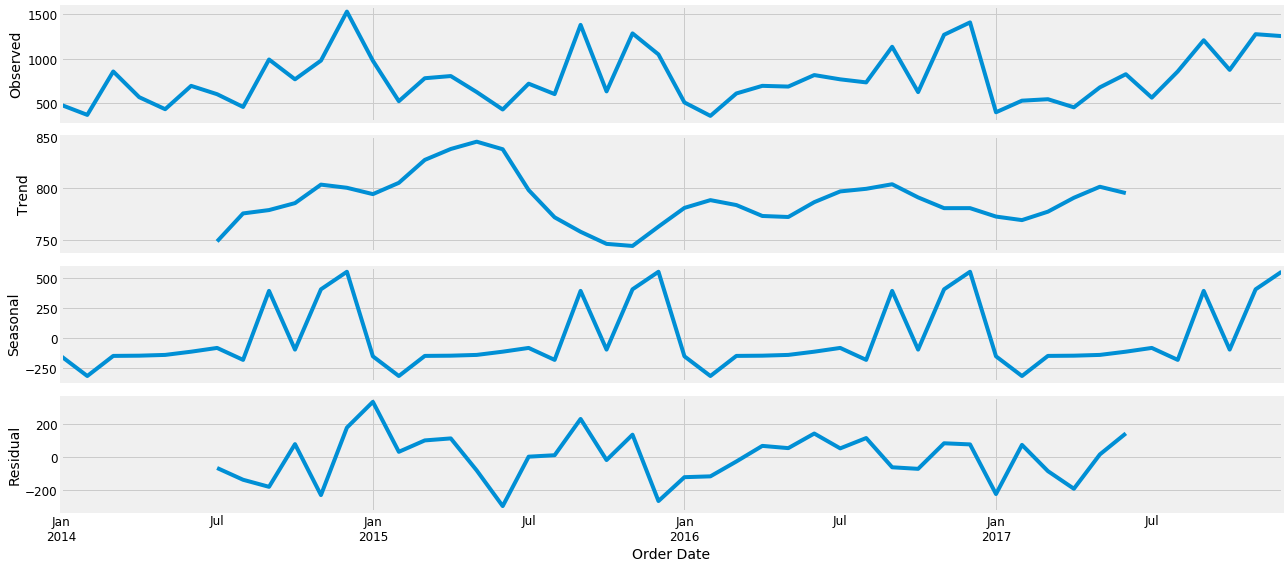

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(y,model = 'additive')
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [11]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]


print("Examples of parameter combinations for seasonals ARIMA....")
print('SARIMAX : {} x {}'.format(pdq[1] , seasonal_pdq[1]))
print('SARIMAX : {} x {}'.format(pdq[1] , seasonal_pdq[2]))
print('SARIMAX : {} x {}'.format(pdq[2] , seasonal_pdq[3]))
print('SARIMAX : {} x {}'.format(pdq[2] , seasonal_pdq[4]))

Examples of parameter combinations for seasonals ARIMA....
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [13]:
import warnings
warnings.simplefilter('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y , order = param, seasonal_order = param_seasonal,
                                           enforce_stationarity=False, enforce_invertibility= False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1395.9272162680086
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1253.2215300527337
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758094
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809138
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.59085502558463
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2640.5179899778777
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468634
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:755.9267712507362
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1132.5893851529177
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(

# Fitting the ARIMA Model 

In [14]:
mod = sm.tsa.statespace.SARIMAX(y ,order = (1,1,1) , seasonal_order = (1,1,0,12) , enforce_stationarity= False , enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


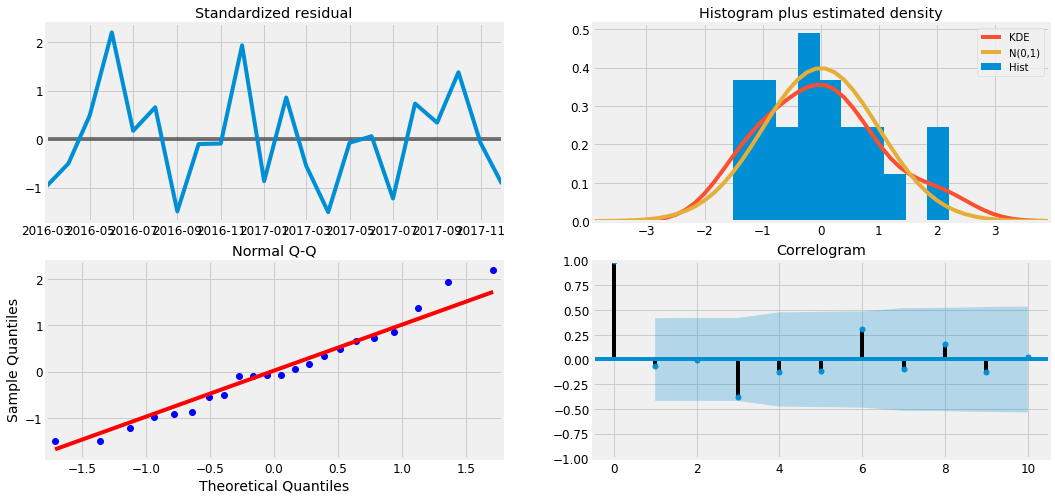

In [15]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

# Validating Forecasts 

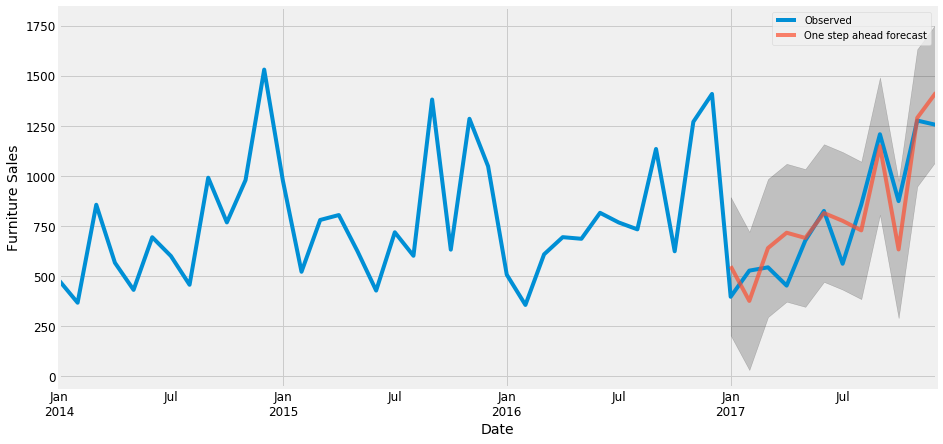

In [16]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01') , dynamic = False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label = 'Observed')
pred.predicted_mean.plot(ax=ax ,label ='One step ahead forecast',alpha=.7 , figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0] , pred_ci.iloc[:,1],color='k',alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel("Furniture Sales")
plt.legend()

plt.show()

# Mean Squared Error 

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth)**2).mean()
print("The mean squared error of our forecase is {}".format(round(mse,2)))

The mean squared error of our forecase is 22993.58


# Root Mean Squared Error 

In [18]:
print("The root mean squared error of our forecasts is {}".format(round(np.sqrt(mse),2)))

The root mean squared error of our forecasts is 151.64


# Producing and visualizing forecasts

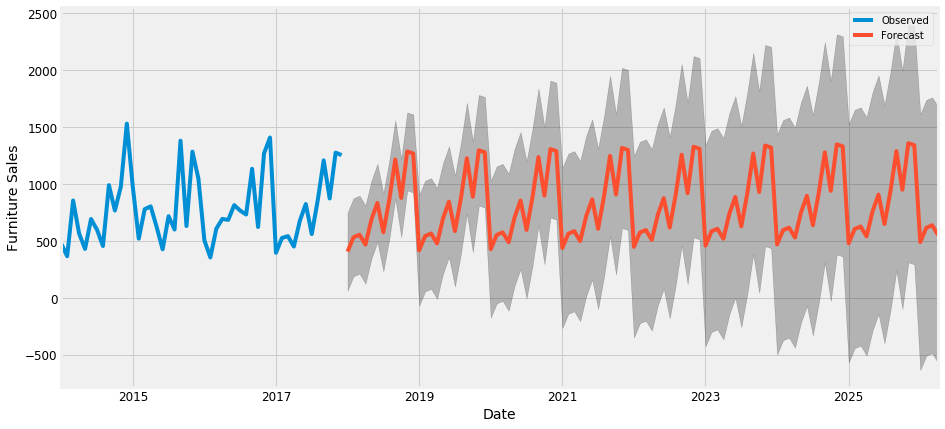

In [19]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()


ax = y.plot(label = 'Observed' , figsize=(14,7))
pred_uc.predicted_mean.plot(ax = ax , label='Forecast')
ax.fill_between(pred_ci.index , pred_ci.iloc[:,0] , pred_ci.iloc[:,1] , color='k' , alpha =.25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Time Series of Furniture vs. Office Supplies

In [20]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

# Data Exploration

In [21]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']

furniture.drop(cols, axis = 1 ,inplace = True)
office.drop(cols , axis = 1 , inplace = True)


furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()


furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()


furniture = pd.DataFrame({'Order Date' : y_furniture.index ,'Sales' : y_furniture.values})
office = pd.DataFrame({'Order Date' : y_office.index , 'Sales' : y_office.values})

store = furniture.merge(office, how = 'inner' , on = 'Order Date')
store.rename(columns = {'Sales_x' : 'furniture_sales' , 'Sales_y' : 'Office_Sales'}, inplace = True)
store.head()


,Order Date,furniture_sales,Office_Sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


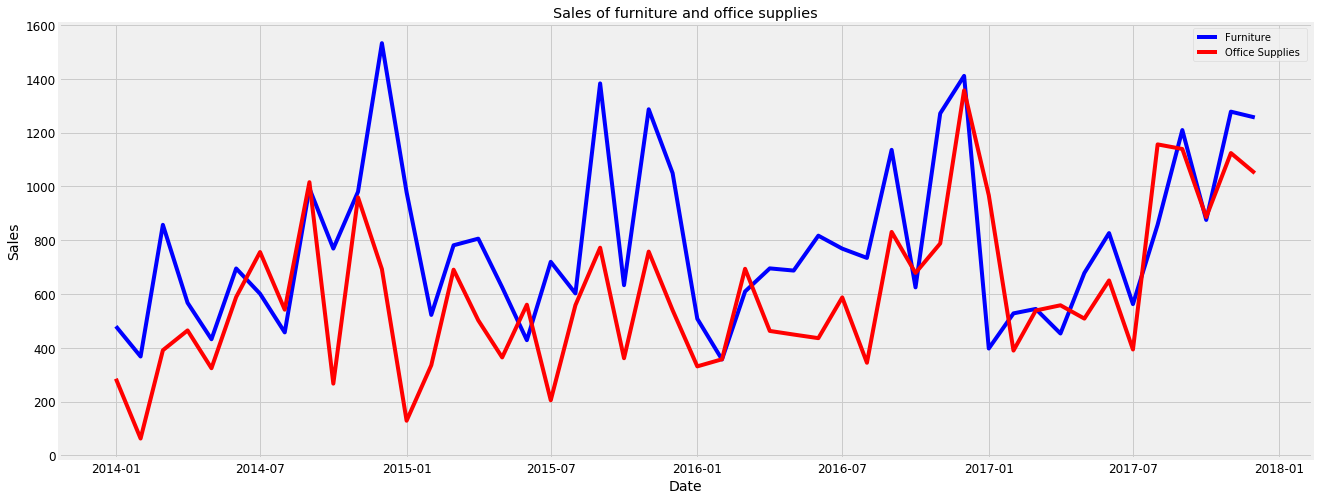

In [22]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'] , store['furniture_sales'] , 'b-' , label = 'Furniture')
plt.plot(store['Order Date'] , store['Office_Sales'] , 'r-' , label = 'Office Supplies ')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and office supplies')
plt.legend()

In [25]:
first_date = store.ix[np.min(list(np.where(store['Office_Sales'] > store['furniture_sales'])[0])), 'Order Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


# Time Series Modeling with Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1, 'Furniture Sales')

<Figure size 1296x1152 with 0 Axes>

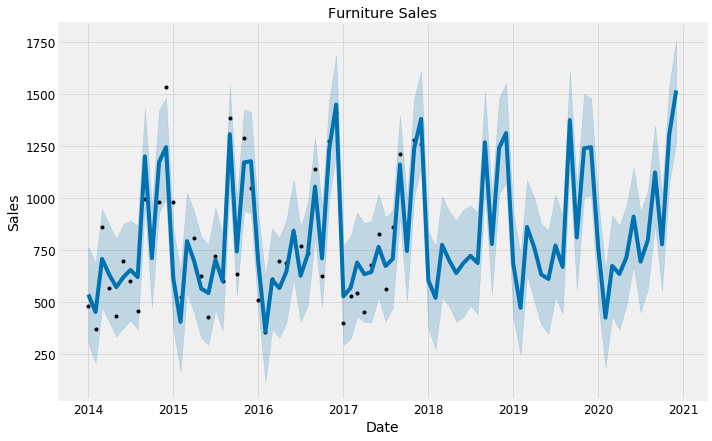

In [26]:
from fbprophet import Prophet 

furniture = furniture.rename(columns={'Order Date' : 'ds' , 'Sales':'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)


office = office.rename(columns={'Order Date' : 'ds' , 'Sales' : 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)


furniture_forecast = furniture_model.make_future_dataframe(periods = 36 , freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods = 36, freq='MS')
office_forecast = office_model.predict(office_forecast)


plt.figure(figsize=(18,16))
furniture_model.plot(furniture_forecast , xlabel = 'Date' , ylabel = 'Sales')
plt.title('Furniture Sales')

Text(0.5, 1, 'Office Supplies Sales')

<Figure size 1296x432 with 0 Axes>

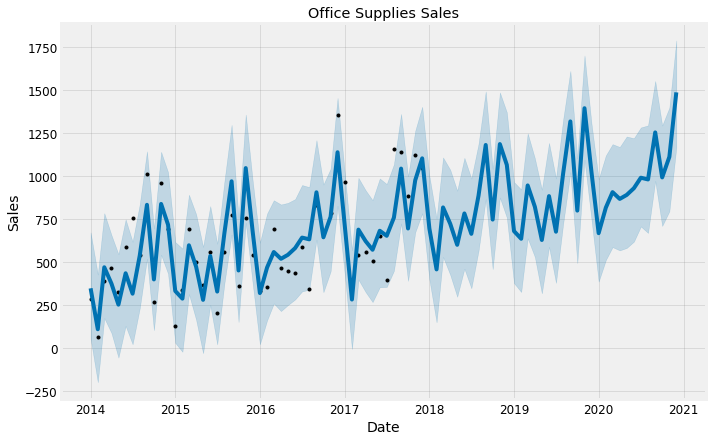

In [27]:
plt.figure(figsize=(18,6))
office_model.plot(office_forecast , xlabel = 'Date' , ylabel = 'Sales')
plt.title('Office Supplies Sales')

#    Compare Forecasts

In [32]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names


forecast = pd.merge(merge_furniture_forecast,merge_office_forecast,how = 'inner',left_on = 'furniture_ds' , right_on = 'office_ds')

forecast = forecast.rename(columns = {'furniture_ds' : 'Date'}).drop('office_ds' , axis = 1)
forecast.head(7)

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,299.766210,765.331046,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,203.881224,685.410476,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,475.932729,946.106347,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,402.218719,869.413973,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,332.878163,802.391207,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682
5,2014-06-01,733.053932,375.550056,875.427865,733.053932,733.053932,-113.832366,-113.832366,-113.832366,-113.832366,...,-88.341183,-88.341183,-88.341183,-88.341183,-88.341183,-88.341183,0.0,0.0,0.0,435.174753
6,2014-07-01,734.443909,411.140743,890.564692,734.443909,734.443909,-81.335686,-81.335686,-81.335686,-81.335686,...,-214.472082,-214.472082,-214.472082,-214.472082,-214.472082,-214.472082,0.0,0.0,0.0,316.193227


# Trend and Forecast Visualization

Text(0.5, 1.0, 'Furniture vs Office Supplies sales trend')

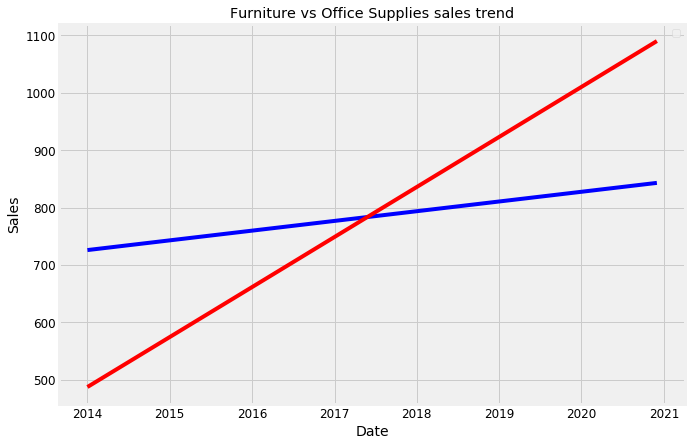

In [35]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'] , forecast['furniture_trend'] , 'b-')
plt.plot(forecast['Date'] , forecast['office_trend'] , 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales trend')

Text(0.5, 1.0, 'Furniture vs Office Supplies sales trend')

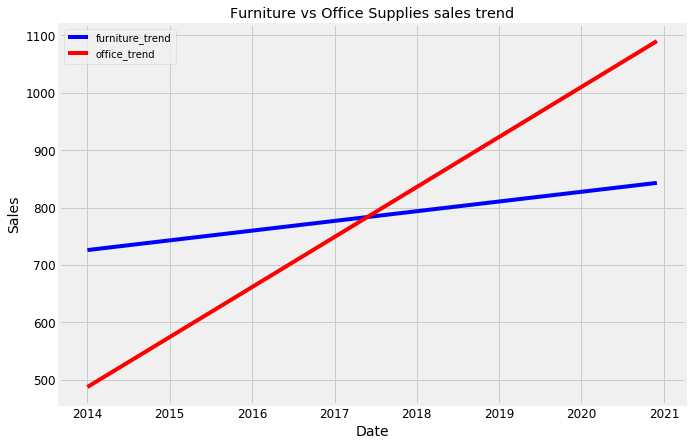

In [39]:
import matplotlib.lines as mlines 
blue_line = mlines.Line2D([] , [] , color = 'blue' , label = 'furniture_trend')
red_line = mlines.Line2D([] ,[] , color = 'red' , label = 'office_trend')

plt.figure(figsize=(10,7))
plt.plot(forecast['Date'] , forecast['furniture_trend'] , 'b-')
plt.plot(forecast['Date'] , forecast['office_trend'] , 'r-')
plt.legend(handles = [blue_line , red_line])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales trend')

Text(0.5, 1.0, 'Furniture vs office supplies estimates')

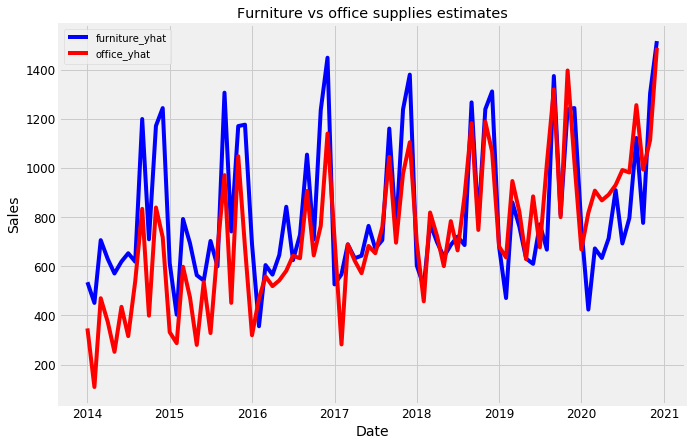

In [40]:
import matplotlib.lines as mlines 
blue_line = mlines.Line2D([] , [] , color = 'blue' , label = 'furniture_yhat')
red_line = mlines.Line2D([] ,[] , color = 'red' , label = 'office_yhat')



plt.figure(figsize=(10,7))
plt.plot(forecast['Date'] ,forecast['furniture_yhat'] , 'b-')
plt.plot(forecast['Date'] , forecast['office_yhat'] , 'r-')
plt.legend(handles = [blue_line , red_line])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs office supplies estimates')

# Trends and Patterns


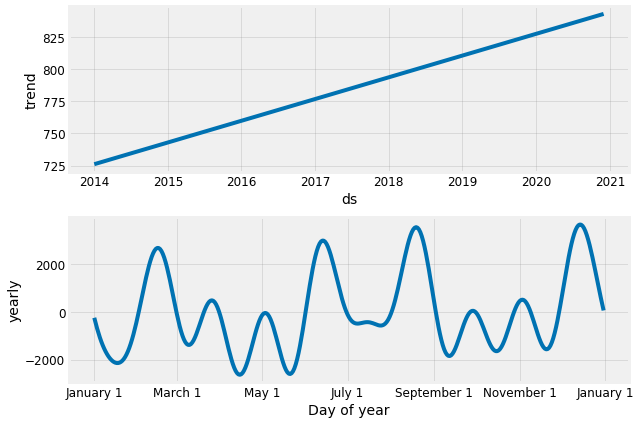

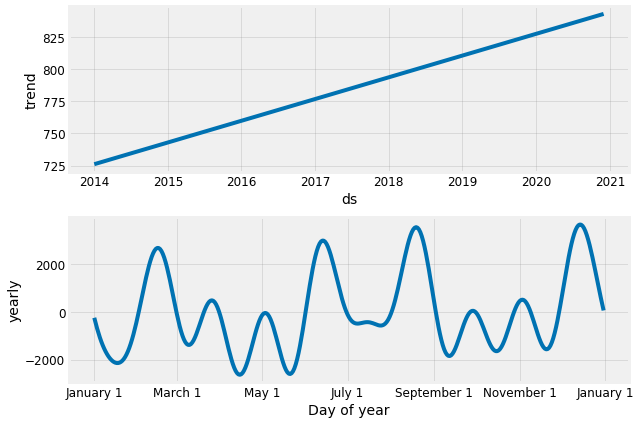

In [41]:
furniture_model.plot_components(furniture_forecast)

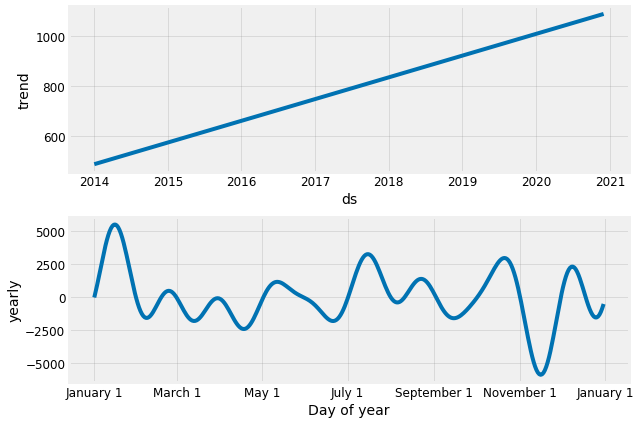

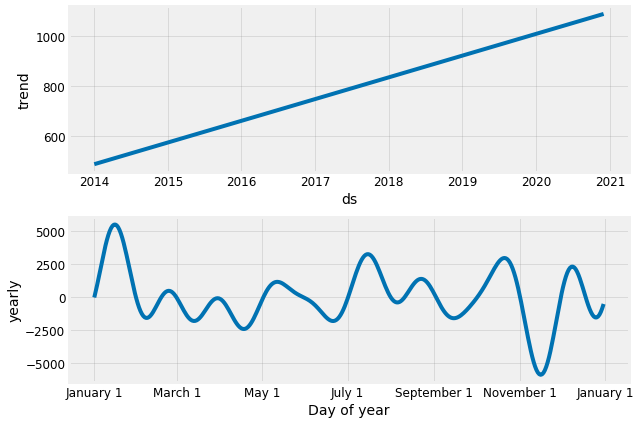

In [42]:
office_model.plot_components(office_forecast)